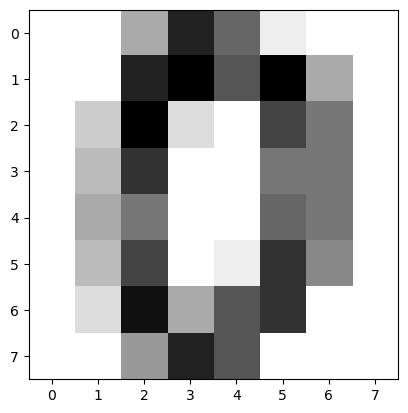

In [53]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [54]:
X = digits.data

In [55]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [56]:
Y = digits.target

In [57]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [58]:
Y.shape

(1797,)

In [59]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [62]:
# X는 평탄화 Y는 원핫인코딩

In [63]:

import pandas as pd


Y = pd.get_dummies(Y).values

In [64]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import numpy as np


model = Sequential()

model.add(Dense(64,input_shape=(64,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,730 (41.91 KB)

 Trainable params: 10,730 (41.91 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model_history=model.fit(x=X_train, y=y_train, epochs=10, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = y_test
y_pred_class = np.argmax(y_pred,axis=1)



#원핫인코딩 뭐 바꾸랫는데.....비교한다고 .......

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2550 - loss: 2.6688 - val_accuracy: 0.6083 - val_loss: 1.1384
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7798 - loss: 0.7645 - val_accuracy: 0.9000 - val_loss: 0.4375
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9122 - loss: 0.3254 - val_accuracy: 0.9139 - val_loss: 0.2881
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9547 - loss: 0.1606 - val_accuracy: 0.9444 - val_loss: 0.2031
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9663 - loss: 0.1171 - val_accuracy: 0.9417 - val_loss: 0.1924
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9735 - loss: 0.0911 - val_accuracy: 0.9667 - val_loss: 0.1486
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0554 - val_accuracy: 0.9667 - val_loss: 0.1231
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9923 - loss: 0.0480 - val_accuracy: 0.9667 - val_lo

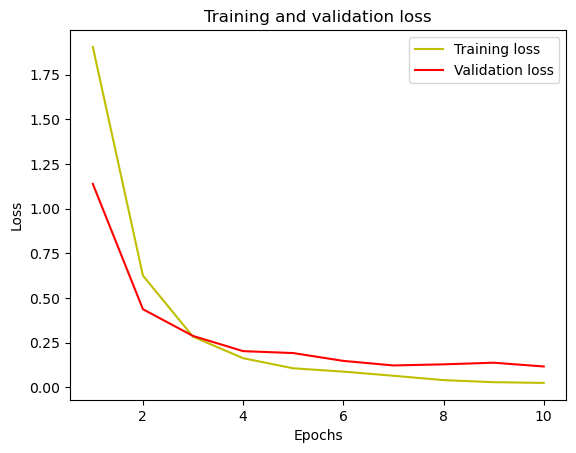

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

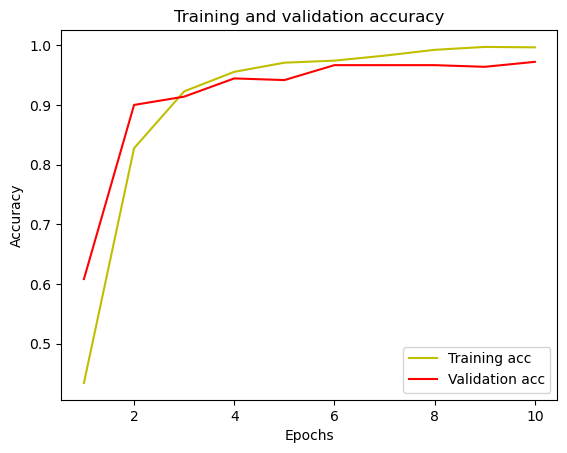

In [67]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# acc이 1.0으로 일정한데 오버피팅? --> val_acc와의 차이가 0.04정도니까 ㄱㅊ(0.1이상차이나면 오버피팅 의심 )
# val_acc의 값이 뚝 떨어지는 곳의 epoch를 오버피팅 발생시점으로 판단 */

In [68]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.97      1.00      0.99        34
           2       0.96      1.00      0.98        49
           3       1.00      0.94      0.97        48
           4       0.96      1.00      0.98        25
           5       0.89      0.92      0.91        26
           6       1.00      0.98      0.99        45
           7       0.95      1.00      0.97        37
           8       1.00      0.91      0.95        33
           9       0.97      0.97      0.97        35

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  1 45  0  1  0  1  0  0]
 [ 0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  1 24  0  0  0  1]
 [ 0  0  1  0  0  0 44  0  0  0]
 [ 0  0  0

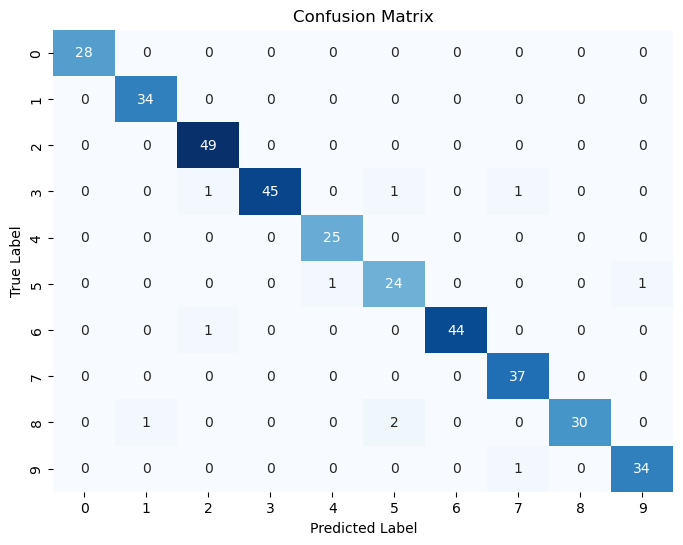

In [70]:
# 표로 ..

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 계산
cm = confusion_matrix(y_test_class, y_pred_class)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
